# ①模型选择 分类问题性能度量

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import  SVC
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import  numpy as np

# 测试 accuracy_score 的用法

In [6]:
#%%
def test_accuracy_score():
    '''
    测试 accuracy_score 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,1,1,0,0]
    print('Accuracy Score(normalize=True):',accuracy_score(y_true,y_pred,normalize=True))
    print('Accuracy Score(normalize=False):',accuracy_score(y_true,y_pred,normalize=False))

# 测试 precision_score 的用法

In [7]:
def test_precision_score():
    '''
    测试 precision_score 的用法

    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))


# 测试 recall_score 的用法

In [8]:
def test_recall_score():
    '''
    测试 recall_score 的用法

    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))


# 测试 f1_score 的用法

In [9]:
def test_f1_score():
    '''
    测试 f1_score 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))
    print('F1 Score:',f1_score(y_true,y_pred))


# 测试 fbeta_score 的用法

In [10]:
def test_fbeta_score():
    '''
    测试 fbeta_score 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Accuracy Score:',accuracy_score(y_true,y_pred,normalize=True))
    print('Precision Score:',precision_score(y_true,y_pred))
    print('Recall Score:',recall_score(y_true,y_pred))
    print('F1 Score:',f1_score(y_true,y_pred))
    print('Fbeta Score(beta=0.001):',fbeta_score(y_true,y_pred,beta=0.001))
    print('Fbeta Score(beta=1):',fbeta_score(y_true,y_pred,beta=1))
    print('Fbeta Score(beta=10):',fbeta_score(y_true,y_pred,beta=10))
    print('Fbeta Score(beta=10000):',fbeta_score(y_true,y_pred,beta=10000))


# 测试 classification_report 的用法

In [11]:
def test_classification_report():
    '''
    测试 classification_report 的用法

    :return:  None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Classification Report:\n',classification_report(y_true,y_pred,
                target_names=["class_0","class_1"]))


# 测试 confusion_matrix 的用法

In [12]:
def test_confusion_matrix():
    '''
    测试 confusion_matrix 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,1,1,0,0,0,0,0,0]
    print('Confusion Matrix:\n',confusion_matrix(y_true,y_pred,labels=[0,1]))


# 测试 precision_recall_curve 的用法，并绘制 P-R 曲线

In [71]:
def test_precision_recall_curve():
    '''
    测试 precision_recall_curve 的用法，并绘制 P-R 曲线

    :return: None
    '''
    ### 加载数据
    iris=load_iris()
    X=iris.data
    y=iris.target
    # 二元化标记
    y = label_binarize(y, classes=[0, 1, 2])
    n_classes = y.shape[1]
    #### 添加噪音
    np.random.seed(0)
    n_samples, n_features = X.shape
    X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

    X_train,X_test,y_train,y_test=train_test_split(X,y,
            test_size=0.5,random_state=0)
    ### 训练模型
    clf=OneVsRestClassifier(SVC(kernel='linear', probability=True,random_state=0))
    clf.fit(X_train,y_train)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    ### 获取 P-R
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            y_score[:, i])
        ax.plot(recall[i],precision[i],label="target=%s"%i)
    ax.set_xlabel("Recall Score")
    ax.set_ylabel("Precision Score")
    ax.set_title("P-R")
    ax.legend(loc='best')
    ax.set_xlim(0,1.1)
    ax.set_ylim(0,1.1)
    ax.grid()
    plt.show()

# 测试 roc_curve、roc_auc_score 的用法，并绘制 ROC 曲线

In [72]:
def test_roc_auc_score():
    '''
    测试 roc_curve、roc_auc_score 的用法，并绘制 ROC 曲线

    :return: None
    '''
    ### 加载数据
    iris=load_iris()
    X=iris.data
    y=iris.target
    # 二元化标记
    y = label_binarize(y, classes=[0, 1, 2])
    n_classes = y.shape[1]
    #### 添加噪音
    np.random.seed(0)
    n_samples, n_features = X.shape
    X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

    X_train,X_test,y_train,y_test=train_test_split(X,y,
            test_size=0.5,random_state=0)
    ### 训练模型
    clf=OneVsRestClassifier(SVC(kernel='linear', probability=True,random_state=0))
    clf.fit(X_train,y_train)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    ### 获取 ROC
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i],y_score[:, i])
        roc_auc[i] = roc_auc_score(fpr[i], tpr[i])
        ax.plot(fpr[i],tpr[i],label="target=%s,auc=%s"%(i,roc_auc[i]))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_title("ROC")
    ax.legend(loc="best")
    ax.set_xlim(0,1.1)
    ax.set_ylim(0,1.1)
    ax.grid()
    plt.show()

# 调用 test_accuracy_score

In [73]:
if __name__=='__main__':
    test_accuracy_score() 

Accuracy Score(normalize=True): 0.5
Accuracy Score(normalize=False): 5


# 调用 test_precision_score

In [74]:
test_precision_score() 

Accuracy Score: 0.7
Precision Score: 1.0


# 调用 test_recall_score

In [75]:
test_recall_score() 

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4


# 调用 test_f1_score

In [76]:
test_f1_score() 

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4
F1 Score: 0.571428571429


# 调用 test_fbeta_score

In [77]:
test_fbeta_score() 

Accuracy Score: 0.7
Precision Score: 1.0
Recall Score: 0.4
F1 Score: 0.571428571429
Fbeta Score(beta=0.001): 0.999998500004
Fbeta Score(beta=1): 0.571428571429
Fbeta Score(beta=10): 0.402390438247
Fbeta Score(beta=10000): 0.4000000024


# 调用 test_classification_report

In [78]:
test_classification_report() 

Classification Report:
              precision    recall  f1-score   support

    class_0       0.62      1.00      0.77         5
    class_1       1.00      0.40      0.57         5

avg / total       0.81      0.70      0.67        10



# 调用 test_confusion_matrix

In [79]:
test_confusion_matrix() 

Confusion Matrix:
 [[5 0]
 [3 2]]


# 调用 test_precision_recall_curve

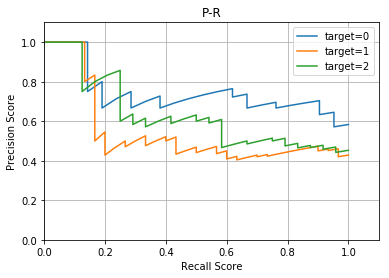

In [80]:
test_precision_recall_curve() 

#  调用 test_roc_auc_score(continuous format is not supported)运行错误一

In [ ]:
test_roc_auc_score()

# ②模型选择 数据集切分

In [81]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,LeaveOneOut\
            ,cross_val_score
import  numpy as np

# 测试  train_test_split 的用法

In [82]:
def test_train_test_split():
    '''
    测试  train_test_split 的用法

    :return:  None
    '''
    X=[[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74]]
    y=[1,1,0,0,1,1,0,0]

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0) # 切分，测试集大小为原始数据集大小的 40%
    print("X_train=",X_train)
    print("X_test=",X_test)
    print("y_train=",y_train)
    print("y_test=",y_test)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,
             random_state=0,stratify=y) # 分层采样切分，测试集大小为原始数据集大小的 40%
    print("Stratify:X_train=",X_train)
    print("Stratify:X_test=",X_test)
    print("Stratify:y_train=",y_train)
    print("Stratify:y_test=",y_test)

# 测试  KFold 的用法

In [83]:
def test_KFold():
    '''
    测试  KFold 的用法

    :return: None
    '''
    X=np.array([[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74],
       [81,82,83,84]])
    y=np.array([1,1,0,0,1,1,0,0,1])

    folder=KFold(n_splits=3,random_state=0,shuffle=False) # 切分之前不混洗数据集
    for train_index,test_index in folder.split(X,y):
          print("Train Index:",train_index)
          print("Test Index:",test_index)
          print("X_train:",X[train_index])
          print("X_test:",X[test_index])
          print("")

    shuffle_folder=KFold(n_splits=3,random_state=0,shuffle=True) # 切分之前混洗数据集
    for train_index,test_index in shuffle_folder.split(X,y):
          print("Shuffled Train Index:",train_index)
          print("Shuffled Test Index:",test_index)
          print("Shuffled X_train:",X[train_index])
          print("Shuffled X_test:",X[test_index])
          print("")

# 测试  StratifiedKFold 的用法

In [84]:
def test_StratifiedKFold():
    '''
    测试  StratifiedKFold 的用法

    :return: None
    '''
    X=np.array([[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34],
       [41,42,43,44],
       [51,52,53,54],
       [61,62,63,64],
       [71,72,73,74]])

    y=np.array([1,1,0,0,1,1,0,0])

    folder=KFold(n_splits=4,random_state=0,shuffle=False)
    stratified_folder=StratifiedKFold(n_splits=4,random_state=0,shuffle=False)
    for train_index,test_index in folder.split(X,y):
          print("Train Index:",train_index)
          print("Test Index:",test_index)
          print("y_train:",y[train_index])
          print("y_test:",y[test_index])
          print("")

    for train_index,test_index in stratified_folder.split(X,y):
          print("Stratified Train Index:",train_index)
          print("Stratified Test Index:",test_index)
          print("Stratified y_train:",y[train_index])
          print("Stratified y_test:",y[test_index])
          print("")

# 测试  LeaveOneOut 的用法

In [85]:
def test_LeaveOneOut():
    '''
    测试  LeaveOneOut 的用法

    :return: None
    '''
    X=np.array([[1,2,3,4],
       [11,12,13,14],
       [21,22,23,24],
       [31,32,33,34]]
    )
    y=np.array([1,1,0,0])

    lo=LeaveOneOut(len(y))
    for train_index,test_index in lo:
          print("Train Index:",train_index)
          print("Test Index:",test_index)
          print("X_train:",X[train_index])
          print("X_test:",X[test_index])
          print("")

# 测试  cross_val_score 的用法

In [86]:
def test_cross_val_score():
    '''
    测试  cross_val_score 的用法

    :return: None
    '''
    from sklearn.datasets import  load_digits
    from sklearn.svm import  LinearSVC

    digits=load_digits() # 加载用于分类问题的数据集
    X=digits.data
    y=digits.target

    result=cross_val_score(LinearSVC(),X,y,cv=10) # 使用 LinearSVC 作为分类器
    print("Cross Val Score is:",result)

# 调用 test_train_test_split 

In [87]:
if __name__=='__main__':
    test_train_test_split() 

X_train= [[31, 32, 33, 34], [1, 2, 3, 4], [51, 52, 53, 54], [41, 42, 43, 44]]
X_test= [[61, 62, 63, 64], [21, 22, 23, 24], [11, 12, 13, 14], [71, 72, 73, 74]]
y_train= [0, 1, 1, 1]
y_test= [0, 0, 1, 0]
Stratify:X_train= [[41, 42, 43, 44], [61, 62, 63, 64], [1, 2, 3, 4], [71, 72, 73, 74]]
Stratify:X_test= [[21, 22, 23, 24], [31, 32, 33, 34], [11, 12, 13, 14], [51, 52, 53, 54]]
Stratify:y_train= [1, 0, 1, 0]
Stratify:y_test= [0, 0, 1, 1]


# 调用 test_KFold

In [88]:
test_KFold()

Train Index: [3 4 5 6 7 8]
Test Index: [0 1 2]
X_train: [[31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
X_test: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]]

Train Index: [0 1 2 6 7 8]
Test Index: [3 4 5]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]
X_test: [[31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]]

Train Index: [0 1 2 3 4 5]
Test Index: [6 7 8]
X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]]
X_test: [[61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]

Shuffled Train Index: [0 3 4 5 6 8]
Shuffled Test Index: [1 2 7]
Shuffled X_train: [[ 1  2  3  4]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [81 82 83 84]]
Shuffled X_test: [[11 12 13 14]
 [21 22 23 24]
 [71 72 73 74]]

Shuffled Train Index: [0 1 2 3 5 7]
Shuffled Test Index: [4 6 8]
Shuffled X_train: [[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [51 52 53 54

# 调用 test_StratifiedKFold 运行错误二

In [90]:
test_StratifiedKFold()

Train Index: [2 3 4 5 6 7]
Test Index: [0 1]
y_train: [0 0 1 1 0 0]
y_test: [1 1]

Train Index: [0 1 4 5 6 7]
Test Index: [2 3]
y_train: [1 1 1 1 0 0]
y_test: [0 0]

Train Index: [0 1 2 3 6 7]
Test Index: [4 5]
y_train: [1 1 0 0 0 0]
y_test: [1 1]

Train Index: [0 1 2 3 4 5]
Test Index: [6 7]
y_train: [1 1 0 0 1 1]
y_test: [0 0]

Stratified Train Index: [1 3 4 5 6 7]
Stratified Test Index: [0 2]
Stratified y_train: [1 0 1 1 0 0]
Stratified y_test: [1 0]

Stratified Train Index: [0 2 4 5 6 7]
Stratified Test Index: [1 3]
Stratified y_train: [1 0 1 1 0 0]
Stratified y_test: [1 0]

Stratified Train Index: [0 1 2 3 5 7]
Stratified Test Index: [4 6]
Stratified y_train: [1 1 0 0 1 0]
Stratified y_test: [1 0]

Stratified Train Index: [0 1 2 3 4 6]
Stratified Test Index: [5 7]
Stratified y_train: [1 1 0 0 1 0]
Stratified y_test: [1 0]



# 调用 test_LeaveOneOut

In [ ]:
test_LeaveOneOut()

# 调用 test_cross_val_score

In [92]:
test_cross_val_score()

Cross Val Score is: [ 0.8972973   0.93989071  0.87292818  0.91666667  0.9273743   0.94413408
  0.97206704  0.94382022  0.86440678  0.92613636]


# ③模型选择 参数优化

In [94]:
from sklearn.datasets import load_digits
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import scipy

# 测试 GridSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、penalty、multi_class 等参数

In [95]:
def test_GridSearchCV():
    '''
    测试 GridSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、penalty、multi_class 等参数

    :return: None
    '''
    ### 加载数据
    digits = load_digits()
    X_train,X_test,y_train,y_test=train_test_split(digits.data, digits.target,test_size=0.25,
                random_state=0,stratify=digits.target)
    #### 参数优化 ######
    tuned_parameters = [{'penalty': ['l1','l2'],
                        'C': [0.01,0.05,0.1,0.5,1,5,10,50,100],
                        'solver':['liblinear'],
                        'multi_class': ['ovr']},

                        {'penalty': ['l2'],
                        'C': [0.01,0.05,0.1,0.5,1,5,10,50,100],
                         'solver':['lbfgs'],
                        'multi_class': ['ovr','multinomial']},
                        ]
    clf=GridSearchCV(LogisticRegression(tol=1e-6),tuned_parameters,cv=10)
    clf.fit(X_train,y_train)
    print("Best parameters set found:",clf.best_params_)
    print("Grid scores:")
    for params, mean_score, scores in clf.grid_scores_:
             print("\t%0.3f (+/-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

    print("Optimized Score:",clf.score(X_test,y_test))
    print("Detailed classification report:")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

# 测试 RandomizedSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、multi_class 等参数。其中 C 的分布函数为指数分布

In [96]:
def test_RandomizedSearchCV():
    '''
    测试 RandomizedSearchCV 的用法。使用 LogisticRegression 作为分类器，主要优化 C、multi_class 等参数。其中 C 的分布函数为指数分布

    :return:  None
    '''
    ### 加载数据
    digits = load_digits()
    X_train,X_test,y_train,y_test=train_test_split(digits.data, digits.target,
                test_size=0.25,random_state=0,stratify=digits.target)
    #### 参数优化 ######
    tuned_parameters ={  'C': scipy.stats.expon(scale=100), # 指数分布
                        'multi_class': ['ovr','multinomial']}
    clf=RandomizedSearchCV(LogisticRegression(penalty='l2',solver='lbfgs',tol=1e-6),
                        tuned_parameters,cv=10,scoring="accuracy",n_iter=100)
    clf.fit(X_train,y_train)
    print("Best parameters set found:",clf.best_params_)
    print("Randomized Grid scores:")
    for params, mean_score, scores in clf.grid_scores_:
             print("\t%0.3f (+/-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

    print("Optimized Score:",clf.score(X_test,y_test))
    print("Detailed classification report:")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

# 调用 test_GridSearchCV

In [119]:
if __name__=='__main__':
    test_GridSearchCV()

Best parameters set found: {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Grid scores:
	0.930 (+/-0.031) for {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
	0.965 (+/-0.022) for {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
	0.964 (+/-0.022) for {'C': 0.05, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
	0.965 (+/-0.023) for {'C': 0.05, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
	0.965 (+/-0.024) for {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
	0.964 (+/-0.023) for {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
	0.958 (+/-0.030) for {'C': 0.5, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
	0.952 (+/-0.028) for {'C': 0.5, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
	0.951 (+/-0.025) for {'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
	0.953 (+/-0.028) for {'C

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# 调用 test_RandomizedSearchCV

In [98]:
test_RandomizedSearchCV() 

Best parameters set found: {'C': 5.2575671792722298, 'multi_class': 'multinomial'}
Randomized Grid scores:
	0.940 (+/-0.024) for {'C': 82.296027730414963, 'multi_class': 'ovr'}
	0.960 (+/-0.026) for {'C': 1.9293057704434464, 'multi_class': 'multinomial'}
	0.958 (+/-0.025) for {'C': 202.66316440840689, 'multi_class': 'multinomial'}
	0.945 (+/-0.028) for {'C': 27.306903767299794, 'multi_class': 'ovr'}
	0.957 (+/-0.027) for {'C': 107.59422789400064, 'multi_class': 'multinomial'}
	0.941 (+/-0.026) for {'C': 65.416229491437932, 'multi_class': 'ovr'}
	0.957 (+/-0.029) for {'C': 27.529670212468638, 'multi_class': 'multinomial'}
	0.947 (+/-0.026) for {'C': 26.630931428152337, 'multi_class': 'ovr'}
	0.941 (+/-0.028) for {'C': 57.344169513497043, 'multi_class': 'ovr'}
	0.941 (+/-0.025) for {'C': 75.442058537104046, 'multi_class': 'ovr'}
	0.936 (+/-0.031) for {'C': 128.94967906115531, 'multi_class': 'ovr'}
	0.961 (+/-0.027) for {'C': 5.2575671792722298, 'multi_class': 'multinomial'}
	0.947 (+/-0.

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# ④模型选择 学习曲线

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# 测试 learning_curve 的用法 。验证对于 LinearSVC 分类器 ，数据集的大小对于预测性能的影响

In [104]:
def test_learning_curve():
    '''
    测试 learning_curve 的用法 。验证对于 LinearSVC 分类器 ，数据集的大小对于预测性能的影响

    :return:
    '''
    ### 加载数据
    digits = load_digits()
    X,y=digits.data,digits.target
    #### 获取学习曲线 ######
    train_sizes=np.linspace(0.1,1.0,endpoint=True,dtype='float')
    abs_trains_sizes,train_scores, test_scores = learning_curve(LinearSVC(),
            X, y,cv=10, scoring="accuracy",train_sizes=train_sizes)
    ###### 对每个 C ，获取 10 折交叉上的预测得分上的均值和方差 #####
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ####### 绘图 ######
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)

    ax.plot(abs_trains_sizes, train_scores_mean, label="Training Accuracy", color="r")
    ax.fill_between(abs_trains_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    ax.plot(abs_trains_sizes, test_scores_mean, label="Testing Accuracy", color="g")
    ax.fill_between(abs_trains_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")

    ax.set_title("Learning Curve with LinearSVC")
    ax.set_xlabel("Sample Nums")
    ax.set_ylabel("Score")
    ax.set_ylim(0,1.1)
    ax.legend(loc='best')
    plt.show()

# 调用 test_learni

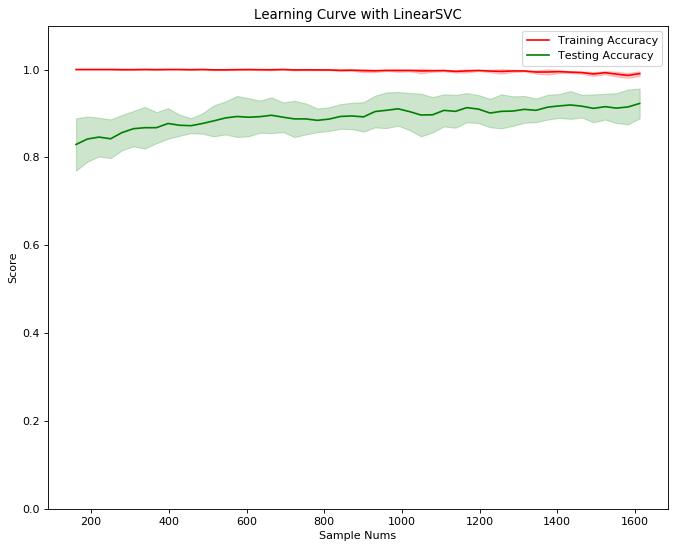

In [105]:
if __name__=="__main__":
    test_learning_curve() 

# ⑤模型选择 损失函数

In [106]:
from sklearn.metrics import zero_one_loss,log_loss

# 测试 0-1 损失函数

In [107]:
def test_zero_one_loss():
    '''
    测试 0-1 损失函数

    :return: None
    '''
    y_true=[1,1,1,1,1,0,0,0,0,0]
    y_pred=[0,0,0,1,1,1,1,1,0,0]
    print("zero_one_loss<fraction>:",zero_one_loss(y_true,y_pred,normalize=True))
    print("zero_one_loss<num>:",zero_one_loss(y_true,y_pred,normalize=False))

# 测试对数损失函数

In [108]:
def test_log_loss():
    '''
    测试对数损失函数

    :return:  None
    '''
    y_true=[1, 1, 1, 0, 0, 0]
    y_pred=[[0.1, 0.9],
            [0.2, 0.8],
            [0.3, 0.7],
            [0.7, 0.3],
            [0.8, 0.2],
            [0.9, 0.1]]
    print("log_loss<average>:",log_loss(y_true,y_pred,normalize=True))
    print("log_loss<total>:",log_loss(y_true,y_pred,normalize=False))

# 调用 test_zero_one_loss

In [109]:
if __name__=="__main__":
    test_zero_one_loss() 

zero_one_loss<fraction>: 0.6
zero_one_loss<num>: 6


# 调用 test_log_loss

In [110]:
test_log_loss() 

log_loss<average>: 0.228393003637
log_loss<total>: 1.37035802182


# ⑥ 模型选择 回归问题性能度量

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# 测试 mean_absolute_error 的用法

In [112]:
def test_mean_absolute_error():
    '''
    测试 mean_absolute_error 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,2,2,2,0,0]
    y_pred=[0,0,0,1,1,1,0,0,0,0]

    print("Mean Absolute Error:",mean_absolute_error(y_true,y_pred))

# 测试 mean_squared_error 的用法

In [113]:
def test_mean_squared_error():
    '''
    测试 mean_squared_error 的用法

    :return: None
    '''
    y_true=[1,1,1,1,1,2,2,2,0,0]
    y_pred=[0,0,0,1,1,1,0,0,0,0]

    print("Mean Absolute Error:",mean_absolute_error(y_true,y_pred))
    print("Mean Square Error:",mean_squared_error(y_true,y_pred))


# 调用  test_mean_absolute_error()

In [114]:
if __name__=="__main__":
    test_mean_absolute_error() 

Mean Absolute Error: 0.8


# 调用  test_mean_squared_error()

In [115]:
test_mean_squared_error() 

Mean Absolute Error: 0.8
Mean Square Error: 1.2


# ⑦模型选择 验证曲线

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.learning_curve import validation_curve

# 测试 validation_curve 的用法 。验证对于 LinearSVC 分类器 ， C 参数对于预测准确率的影响

In [117]:
def test_validation_curve():
    '''
    测试 validation_curve 的用法 。验证对于 LinearSVC 分类器 ， C 参数对于预测准确率的影响

    :return:  None
    '''
    ### 加载数据
    digits = load_digits()
    X,y=digits.data,digits.target
    #### 获取验证曲线 ######
    param_name="C"
    param_range = np.logspace(-2, 2)
    train_scores, test_scores = validation_curve(LinearSVC(), X, y, param_name=param_name,
             param_range=param_range,cv=10, scoring="accuracy")
    ###### 对每个 C ，获取 10 折交叉上的预测得分上的均值和方差 #####
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ####### 绘图 ######
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)

    ax.semilogx(param_range, train_scores_mean, label="Training Accuracy", color="r")
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    ax.semilogx(param_range, test_scores_mean, label="Testing Accuracy", color="g")
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")

    ax.set_title("Validation Curve with LinearSVC")
    ax.set_xlabel("C")
    ax.set_ylabel("Score")
    ax.set_ylim(0,1.1)
    ax.legend(loc='best')
    plt.show()

# 调用 test_validation_curve

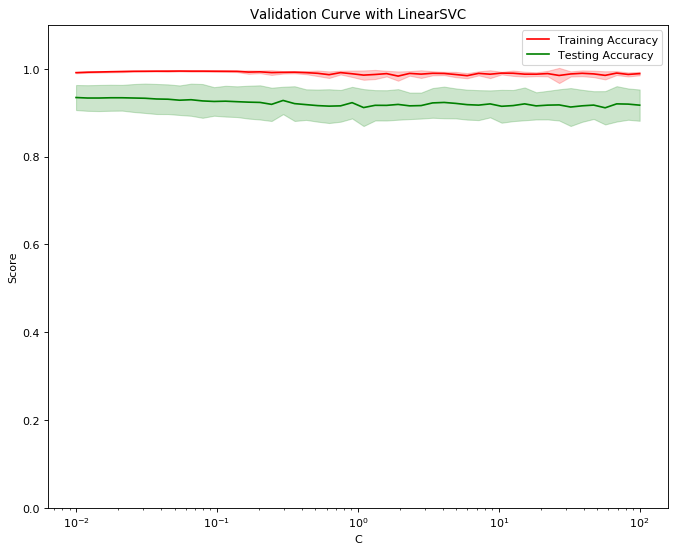

In [118]:
if __name__=='__main__':
    test_validation_curve() 